# 1. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
from numpy import asarray
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import scipy
import folium
import json
import requests
import datetime
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
import pylab as pl 

# 2. Import Data

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/golde/Crime Analysis/'

In [4]:
crimes = pd.read_csv(os.path.join(path, '2. Data','Prepared Data', 'crimes_w_dates.csv'))

In [5]:
pd.options.display.max_columns = None

In [6]:
crimes = crimes.drop(columns = ['Unnamed: 0'])

In [7]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Neighborhood,New_Dates,Time,Day,Month,Crime Type,Season
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/18 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)",New City,2015-09-05,13:30:00,5,9,Violent,Fall
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/18 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)",Austin,2015-09-04,11:30:00,4,9,Non-Violent,Fall
2,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/18 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)",Avondale,2015-09-05,12:45:00,5,9,Non-Violent,Fall
3,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/18 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)",Austin,2015-09-05,13:00:00,5,9,Non-Violent,Fall
4,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/18 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)",Auburn Gresham,2015-09-05,10:55:00,5,9,Non-Violent,Fall


# 3. Data Wrangling

In [ ]:
enc = OneHotEncoder()

In [ ]:
le = LabelEncoder()

In [ ]:
X = crimes.select_dtypes(include=[object])

In [ ]:
X.columns

In [ ]:
X = X[['Date','IUCR','Primary Type','Location Description','FBI Code','Neighborhood','Crime Type','Season']]

In [ ]:
#FIT
X_2 = X.apply(le.fit_transform)

In [ ]:
# FIT
enc.fit(X_2)

In [ ]:
# Transform
onehotlabels = enc.transform(X_2).toarray()

# 4. Elbow Technique

In [10]:
y = crimes.select_dtypes(include=[int,float])

In [11]:
y

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Day,Month
0,10224738,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,5,9
1,10224739,1511,15.0,29.0,25.0,1138875.0,1904869.0,2015,41.895080,-87.765400,4,9
2,10224740,1412,14.0,35.0,21.0,1152037.0,1920384.0,2015,41.937406,-87.716650,5,9
3,10224741,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,5,9
4,10224742,614,6.0,21.0,71.0,1168430.0,1850165.0,2015,41.744379,-87.658431,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1015296,11870906,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,24,10
1015297,1316816,2533,25.0,37.0,25.0,1141728.0,1910856.0,2001,41.911457,-87.754774,3,1
1015298,11580899,2533,25.0,37.0,25.0,1142432.0,1908180.0,2019,41.904101,-87.752254,29,1
1015299,11870601,312,3.0,20.0,42.0,1180341.0,1863044.0,2019,41.779456,-87.614393,24,10


In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.



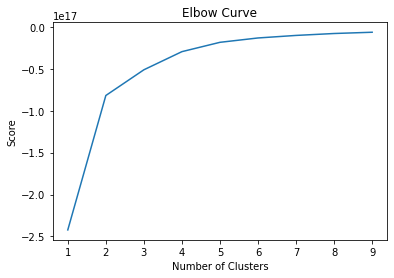

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 5. K-means

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(y)

/Users/golde/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [19]:
y['clusters'] = kmeans.fit_predict(y)

/Users/golde/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-19-090bc9248c9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['clusters'] = kmeans.fit_predict(y)


In [20]:
y['clusters'].value_counts()

2    354718
0    354532
1    306051
Name: clusters, dtype: int64

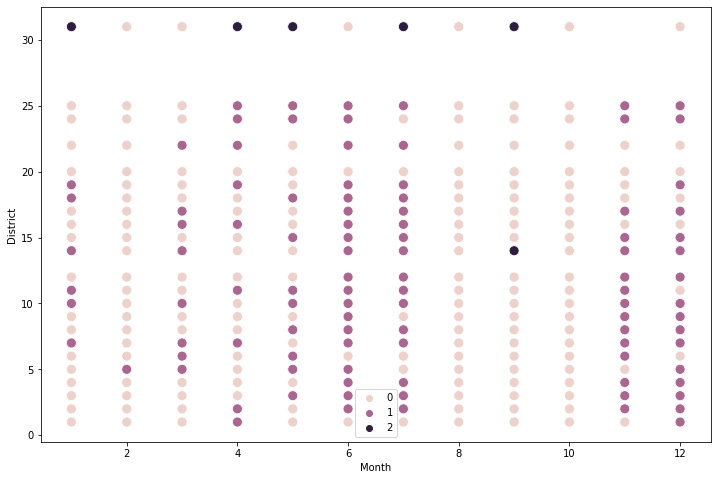

In [23]:
# Plot the clusters for the "Month" and "District" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=y['Month'], y=y['District'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Month') # Label x-axis.
plt.ylabel('District') # Label y-axis.
plt.show()

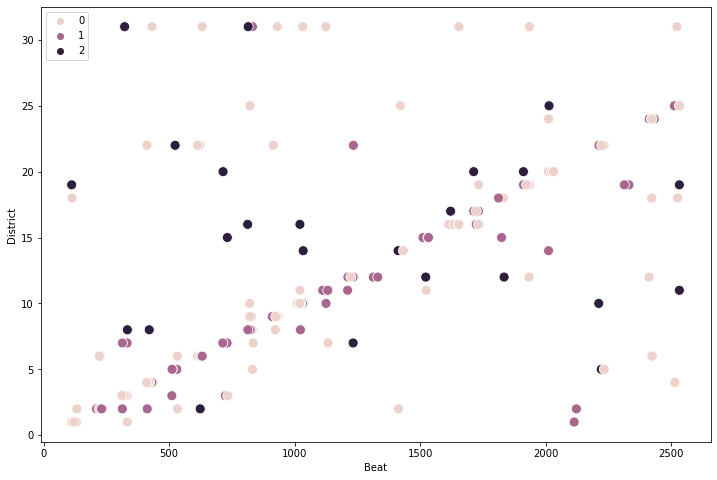

In [24]:
# Plot the clusters for the "Beat" and "District" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=y['Beat'], y=y['District'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Beat') # Label x-axis.
plt.ylabel('District') # Label y-axis.
plt.show()

In [25]:
y.loc[y['clusters'] == 2, 'cluster'] = 'dark purple'
y.loc[y['clusters'] == 1, 'cluster'] = 'purple'
y.loc[y['clusters'] == 0, 'cluster'] = 'pink'

/Users/golde/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/golde/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/golde/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [26]:
y.groupby('cluster').agg({'ID':['mean', 'median'], 
                         'Beat':['mean', 'median'], 
                         'District':['mean', 'median'],
                         'Ward':['mean', 'median'],
                          'Community Area':['mean', 'median']})

ID                     Beat          District         \
                     mean      median         mean median       mean median   
cluster                                                                       
dark purple  1.094102e+07  10944829.5  1145.282258   1031  11.224502   10.0   
pink         1.146623e+07  11449731.5  1138.686418   1024  11.158705   10.0   
purple       1.038769e+07  10397780.0  1142.549895   1024  11.196673   10.0   

                  Ward        Community Area         
                  mean median           mean median  
cluster                                              
dark purple  23.214077   24.0      36.632562   32.0  
pink         23.360261   24.0      36.581654   32.0  
purple       22.903457   23.0      37.234601   32.0